In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.ensemble import RandomForestRegressor
import sys
from sklearn.model_selection import train_test_split

#imports the own created package
from sklearn.tree import export_graphviz
import clustering as cl
import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


In [2]:
sns.set(style='whitegrid', rc={'figure.figsize':(11.7,8.27)})
sns.set_context('talk', rc={ 'lines.linewidth': 6}, font_scale=1.5)

## Team Results of actual Season Top Leagues: Germany, Italy, France, England and Spain

In [3]:
def country_df(csv):
    df = pd.read_csv(csv)
    df.sort_values('team_name', inplace=True)
    df.reset_index(inplace=True)
    df.drop("index", axis=1, inplace=True)
    return df

In [4]:
# df_aufsteiger
df_france = country_df("france-ligue-1-teams-2019-to-2020-stats.csv")
df_germany = country_df("germany-bundesliga-teams-2019-to-2020-stats.csv")
df_england = country_df("england-premier-league-teams-2018-to-2019-stats.csv")
df_italy = country_df("italy-serie-a-teams-2019-to-2020-stats.csv")
df_spain = country_df("spain-la-liga-teams-2019-to-2020-stats.csv")

## Team Results of last Season

In [5]:
# df_teams_last_first = pd.read_csv("germany-bundesliga-teams-2018-to-2019-stats.csv")
# df_teams_last_first.drop([14, 15, 16], inplace = True)

In [6]:
# df_teams_last_second = pd.read_csv("germany-2-bundesliga-teams-2018-to-2019-stats.csv")
# df_teams_last_second = df_teams_last_second.loc[[1,4,7]]

In [7]:
# df_teams_last_year = pd.concat([df_teams_last_first, df_teams_last_second], axis=0)
# df_teams_last_year.sort_values('team_name', inplace=True)
# df_teams_last_year.reset_index(inplace=True)
# df_teams_last_year.drop("index", axis=1, inplace=True)

## Match Data from League Climbers

2018 - 2019

In [8]:
df_teams_last_first = pd.read_csv("germany-bundesliga-teams-2018-to-2019-stats.csv")

In [9]:
df_nueremberg = df_teams_last_first[df_teams_last_first['common_name'] == 'Nürnberg']
df_hannover = df_teams_last_first[df_teams_last_first['common_name'] == 'Hannover 96']
df_stuttgart = df_teams_last_first[df_teams_last_first['common_name'] == 'Stuttgart']

2017 - 2018

In [10]:
df_teams_last_17_18 = pd.read_csv("germany-bundesliga-teams-2017-to-2018-stats.csv")

In [11]:
df_hsv = df_teams_last_17_18[df_teams_last_17_18['common_name'] == 'Hamburger SV']

2016 - 2017

In [12]:
df_teams_last_16_17 = pd.read_csv("germany-bundesliga-teams-2016-to-2017-stats.csv")

In [13]:
df_darmstadt = df_teams_last_16_17[df_teams_last_16_17['common_name'] == 'Darmstadt 98']
df_ingolstadt = df_teams_last_16_17[df_teams_last_16_17['common_name'] == 'Ingolstadt']

In [14]:
# per_cols = [col for col in df_nueremberg.columns if '_per_' in col]

In [15]:
# df_per_actual = df_teams[per_cols]
# df_per_last = df_teams_last_year[per_cols]
# df_per_both = (df_per_actual + df_per_last) / 2

In [16]:
# df_actual = df_teams.drop(per_cols, axis=1)
# df_last = df_teams_last_year.drop(per_cols, axis=1)
# df_sum = df_actual.iloc[:,4:] + df_last.iloc[:,4:]

In [17]:
# df_germany = pd.concat([df_teams.iloc[:,:4], df_sum, df_per_both], axis=1, sort=False)

In [18]:
# df_germany.head()

## Concat all Df's

In [19]:
df_all = pd.concat([df_germany, df_england, df_italy, df_spain, df_france],sort=False)
df_all.reset_index(inplace=True)
df_all.drop("index", axis=1, inplace=True)
df_european_leagues = df_all.copy()

In [20]:
df_league_climbers = pd.concat([df_nueremberg, df_hannover, df_stuttgart, df_hsv, df_darmstadt, df_ingolstadt],sort=False)
df_league_climbers.reset_index(inplace=True)
df_league_climbers.drop("index", axis=1, inplace=True)
df_all_climbers = df_league_climbers.copy()
columns = ['wins', 'wins_home', 'wins_away', 'draws', 'draws_home', 'draws_away', 'losses', 'losses_home', 'losses_away']
df_all_climbers[columns] = df_all_climbers[columns] * .75


In [21]:
df_all = pd.concat([df_european_leagues, df_all_climbers],sort=False)
df_all.reset_index(inplace=True)
df_all.drop("index", axis=1, inplace=True)
df_total = df_all.copy()

## Build the matrix

In [22]:
df_all.set_index("team_name", inplace=True)
df_all = df_all.T

In [23]:
# df_all = df_all.iloc[:25, :]

In [24]:
df_teams_numerical = df_all.iloc[8:,:]

In [25]:
df_norm = (df_teams_numerical - df_teams_numerical.min()) / (df_teams_numerical.max() - df_teams_numerical.min())

In [26]:
X = df_norm.as_matrix()

## AA Analysis

In [27]:
archetypal=cl.clustering.ArchetypalAnalysis(n_archetypes=5,iterations=50,tmax=300)
archetypal.fit(X)

Z=(archetypal.archetypes())

RSS = 3.9898834911543757
RSS = 3.6653942654991343
RSS = 3.579445457256361
RSS = 3.542156502936707
RSS = 3.5253204152869166
RSS = 3.517180189827267
RSS = 3.512728517451367
RSS = 3.5099479259503386
RSS = 3.507744259121029
RSS = 3.5056468997346655
RSS = 3.504053951002696
RSS = 3.502707100004029
RSS = 3.5017145912038505
RSS = 3.501072261711972
RSS = 3.500356865520245
RSS = 3.4998882690933937
RSS = 3.499363096234036
RSS = 3.4989581185077556
RSS = 3.498481611700036
RSS = 3.498286011253308
RSS = 3.4979163917884546
RSS = 3.4977350203868185
RSS = 3.4975537334493234
RSS = 3.4973140634485405
RSS = 3.4971221370326324
RSS = 3.496893249857557
RSS = 3.4967533330250884
RSS = 3.496533172396736
RSS = 3.496421158550108
RSS = 3.4962391818819922
RSS = 3.496060312476594
RSS = 3.4957603546266625
RSS = 3.495560516363129
RSS = 3.4952311099102165
RSS = 3.49499926868384
RSS = 3.4944344712547615
RSS = 3.493940922370932
RSS = 3.4930713635120023
RSS = 3.491794258409481
RSS = 3.489867439528002
RSS = 3.48748574659694

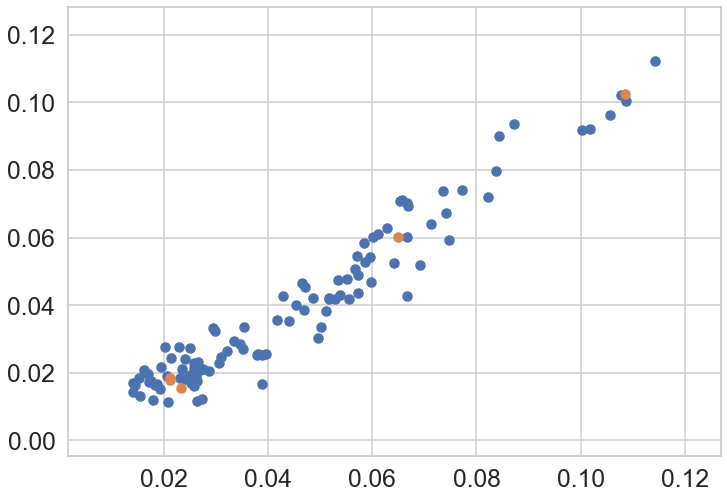

In [28]:
plt.scatter(X[0,:],X[1,:])
plt.scatter(np.array(Z[0,:]),np.array(Z[1,:]))
plt.show()

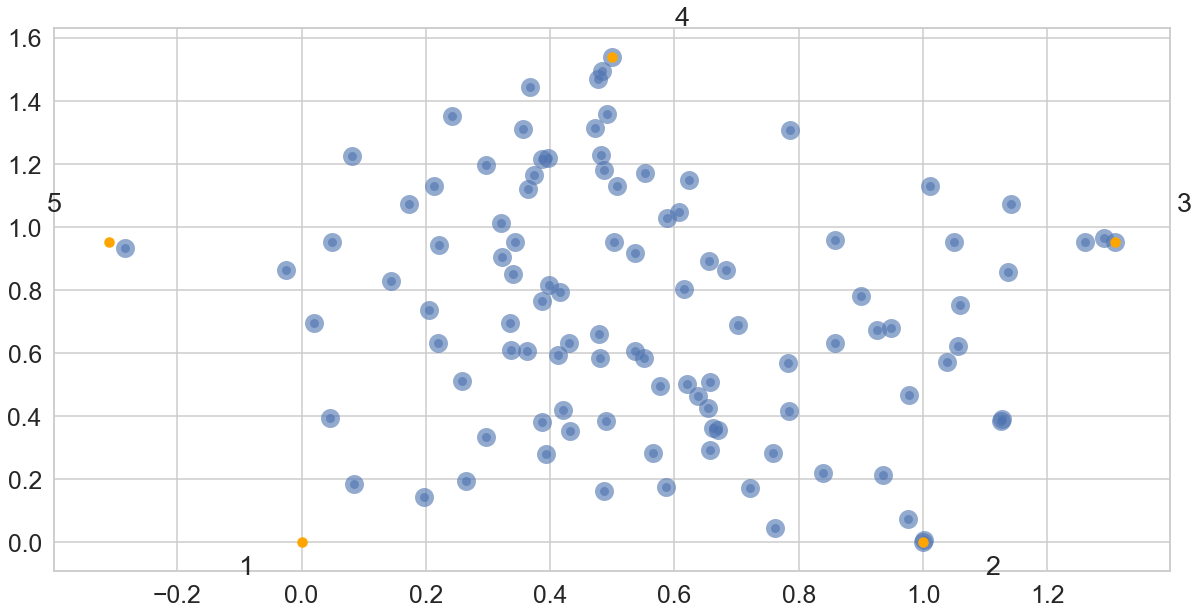

In [29]:
A=archetypal.transform(X)
dp=archetypal.map2D
dat=dp @ A

f, ax = plt.subplots(figsize=(20, 10))
ax=cl.clustering.archetypal_plot(ax,dat,dp,epsilon=.1)
ax.set_aspect('auto')
plt.show()

## Create data labels

In [30]:
teamsList = df_total['team_name']
temasColumnOrdering={x:y for y,x in enumerate(teamsList)}
labels={v: k for k, v in temasColumnOrdering.items()}

In [31]:
for i in range(0,104):
    print("{:40}".format(labels[i]),end='')
    for j in A[:,i]:
        print("{:.3f} ".format(j),end='')
    print("")

1. FC Köln                              0.758 0.085 0.000 0.059 0.098 
1. FC Union Berlin                      0.445 0.141 0.020 0.000 0.393 
1. FSV Mainz 05                         0.504 0.000 0.226 0.270 0.000 
BVB 09 Borussia Dortmund                0.272 0.000 0.000 0.728 0.000 
Bayer 04 Leverkusen                     0.126 0.140 0.000 0.734 0.000 
Borussia VfL Mönchengladbach            0.286 0.187 0.000 0.449 0.077 
Düsseldorfer TuS Fortuna 1895           0.598 0.022 0.343 0.037 0.000 
Eintracht Frankfurt                     0.425 0.000 0.159 0.417 0.000 
FC Augsburg                             0.798 0.000 0.202 0.000 0.000 
FC Bayern München                       0.045 0.000 0.000 0.955 0.000 
FC Schalke 04                           0.344 0.474 0.000 0.183 0.000 
Hertha BSC                              0.850 0.000 0.150 0.000 0.000 
Rasen Ballsport Leipzig                 0.206 0.000 0.000 0.782 0.012 
SC Freiburg                             0.306 0.264 0.000 0.429 0.000 
SC Pad

## Merge Result with original dataframe

In [32]:
df_aa_result = pd.DataFrame(data=A.T)
df_aa_result.columns = df_aa_result.columns.map(str)

In [34]:
df_teams_with_aa = pd.concat([df_total, df_aa_result], axis=1)
df_teams_only_aa = df_teams_with_aa.iloc[:,280:]
df_teams_only_aa['common_name'] = df_teams_with_aa['common_name']

In [35]:
df_teams_only_aa

,0,1,2,3,4,common_name
0,0.758184,0.084784,0.000044,0.058715,0.098272,Köln
1,0.445316,0.141085,0.020487,0.000066,0.393045,Union Berlin
2,0.504385,0.000000,0.225604,0.270011,0.000000,Mainz 05
3,0.272337,0.000000,0.000000,0.727663,0.000000,Borussia Dortmund
4,0.125869,0.139956,0.000044,0.734131,0.000000,Bayer Leverkusen
...,...,...,...,...,...,...
99,0.000000,0.000000,0.839446,0.000000,0.160554,Hannover 96
100,0.100576,0.000000,0.874286,0.000000,0.025138,Stuttgart
101,0.000000,0.000000,0.403610,0.000000,0.596390,Hamburger SV
102,0.000000,0.000000,0.501661,0.000000,0.498339,Darmstadt 98


## Save Result as Pickle file

In [36]:
df_teams_only_aa.to_pickle("df_teams_only_aa.pkl")